## Modèle de difusion-réaction:



   Nous allons programmer un système d'interaction-diffusion de 2
    espèces chimiques, pour cela nous utilisons le modèle de Gray-Scott.

#### Système de Gray-Scott:
   Dans ce modèle nous utilisons 2 espèces chimiques U et V, représentées par leurs concentrations respectives en chaque point de l'espace(domaine) par u et v. 

   Ce modèle suit les règles suivantes:

1) chaque espèce se diffuse dans le domaine à un taux qui lui est propre.

2) l'espèce U est ajoutée dans le système a une vitesse d'alimentation constante.

3) équation de la réaction:
        $\; 2V+U\rightarrow 3V$



La modélisation de ce système est représenté par ce système de 2 équations différantielles partielles suivantes:

\begin{align}
\frac{\partial u}{\partial t} &= D_u \nabla ^2 u - uv^2 + F(1-u)\\
\frac{\partial v}{\partial t} &= D_v \nabla ^2 v + uv^2 - (F + k)v
\end{align}

#### Explication des termes présents dans les 2 équations:

$\frac{\partial u}{\partial t}$  et $\frac{\partial v}{\partial t}$
représente la variation des concentrations dans le temps.

$\nabla ^2 u$ et $\nabla ^2 v$  représente la diffusion spatiale de chaque concentration.

$uv^2$ représente "la réaction", c'est à dire: 
$\; 2V+U\rightarrow 3V$


$F(1-u)$ de (1) représente l'approvisionnement de U dans le système. 


$(F + k)v$ de (2) représente la diminution de V dans le système. 

         


où: 

$D_u$ et $D_v$ : représentent les coefficients de diffusion des 2 espèces.

$F$ : taux d'alimentation.

$k$ : constante.

In [14]:
#Importation des librairies:

import numpy
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

##### Déclaration des constantes:

Nous posons:

-pour la discrétisation spatiale:
$dh$=$dx$=$dy$  

-pour la discrétisation temporelle:
nous avons utilisés dans notre programme ${\mathbf{la\ méthode\ explicite}}$  qui n'est stable que pour des temps $dt$ très petits.


In [15]:
#Déclaration des constantes:

n = 192   # Nombre de points dans la grille (domaine)
Du, Dv, F, k = 0.00016, 0.00008, 0.035, 0.065 # Bacteria 1 
dh = 5./(n-1)
T = 8000
dt = .9 * dh**2 / (4*max(Du,Dv))
nt = int(T/dt)

##### Importation des concentrations initales:

Nous importons les concentrations u et v en chaque point du domaine des 2 espèces chimiques à partir d'un fichier donnée dans l'énoncé.


In [16]:
#Déclaration des conditions initiales:  

uvinitial = numpy.load('./data/uvinitial.npz')
U = uvinitial['U']
V = uvinitial['V']

###### Visualisation des concentrations initiales: u et v en chaque point du domaine :

In [17]:
print("concentrations initiales de l'espèce U",U)
print("concentration initiales de l'espèce V",V)


concentrations initiales de l'espèce U [[ 1.03341932  1.00909902  1.03523907 ...,  1.01236     1.02769296
   1.01185515]
 [ 1.02049366  1.03874603  1.03186003 ...,  1.00917594  1.00648275
   1.01929723]
 [ 1.0297385   1.02874589  1.02488765 ...,  1.0345737   1.00195443
   1.03189674]
 ..., 
 [ 1.03851006  1.01833226  1.00260628 ...,  1.00514165  1.04292736
   1.0090857 ]
 [ 1.03951143  1.0425582   1.03609776 ...,  1.00643229  1.04094253
   1.03869138]
 [ 1.01132752  1.00554757  1.00241105 ...,  1.04435044  1.02683595
   1.01239924]]
concentration initiales de l'espèce V [[ 0.04286057  0.01747253  0.03235064 ...,  0.0283667   0.03892816
   0.0255146 ]
 [ 0.03567483  0.04898278  0.03607639 ...,  0.02100673  0.0305137
   0.00374435]
 [ 0.04936444  0.0423903   0.00414055 ...,  0.02084643  0.03015715
   0.03085144]
 ..., 
 [ 0.03707045  0.03856759  0.01737007 ...,  0.00421018  0.03256909
   0.00247397]
 [ 0.04781775  0.00190273  0.02729943 ...,  0.02507722  0.0468819
   0.00760259]
 [ 0.017

#### Copie des concentrations initiales :

qui seront utilisées pour le cacul de la première itération dans le temps.

In [18]:
u_n=U.copy()
v_n=V.copy()


####  Définiton d'une fonction pour calculer les concentrations des 2 espèces suivant le modèle Gray-Scott:

#### La discrétisation utiisées est : ${\underline{Forward\ time/Central\ space}}$   
comme suit:

\begin{equation}u_{i,j}^{n+1}=u_{i,j}^{n}+\frac{\ D_u\Delta t}{\Delta h^2}\left(\left( u_{i+1,j}^{n}-2u_{i,j}^{n}+u_{i-1,j}^{n} \right)+\left(u_{i,j+1}^{n}-2u_{i,j}^{n}+u_{i,j-1}^{n}\right)\right)\\-\Delta t\ u_{i,j}^{n}\ \left(v_{i,j}^{n}\right)^2 +F\Delta t\ (1-u_{i,j}^{n})
\end{equation}


\begin{equation}v_{i,j}^{n+1}=v_{i,j}^{n}+\frac{\ D_v\Delta t}{\Delta h^2}\left(\left( v_{i+1,j}^{n}-2v_{i,j}^{n}+v_{i-1,j}^{n} \right)+\left(v_{i,j+1}^{n}-2v_{i,j}^{n}+v_{i,j-1}^{n}\right)\right)\\+\Delta t\ u_{i,j}^{n}\ \left(v_{i,j}^{n}\right)^2 -\Delta t\ (F+k)(v_{i,j}^{n})
\end{equation}



#### Conditions aux bords:

   On utilise les conditions aux bords de Neumann pour tous les côtés du domaine avec: 
   
   \begin{equation}    
     q_y=q_x=0
    \end{equation}
où:
\begin{equation}
\left. \frac{\partial T}{\partial x} \right|_{x = bords} = q_x(t)
\end{equation}
et
\begin{equation}
\left. \frac{\partial T}{\partial y} \right|_{y = bords} = q_y(t)
\end{equation}

qui représentent les densités de flux de chaleur.

pour appliquer ces conditions dans nos itérations, nous écrivons:


T[position du bord] = T[position juste avant le bord]


ce qui assure que le gradient soit égal à zéro à chaque itération.


In [19]:
def ftcs(u_n,v_n,dt,dh,Du,Dv,F,k):
    
    for t in range(nt):
        un=u_n.copy()
        vn=v_n.copy()
        u_n[1:-1,1:-1]=un[1:-1,1:-1]+(Du*dt/dh**2)*((un[2:,1:-1]-2*un[1:-1,1:-1]+un[:-2,1:-1])+\
        (un[1:-1,2:]-2*un[1:-1,1:-1]+un[1:-1,:-2]))-dt*un[1:-1,1:-1]*(vn[1:-1,1:-1]**2)+(dt*F)*(1-un[1:-1,1:-1])
         #conditions de Neumann pour u sur les 4 bords du domaine : 
        u_n[-1,:]=u_n[-2,:]
        u_n[0,:]=u_n[1,:]
        u_n[:,-1]=u_n[:,-2]
        u_n[:,0]=u_n[:,1]
    
        v_n[1:-1,1:-1]=vn[1:-1,1:-1]+(Dv*dt/dh**2)*((vn[2:,1:-1]-2*vn[1:-1,1:-1]+vn[:-2,1:-1])+\
        (vn[1:-1,2:]-2*vn[1:-1,1:-1]+vn[1:-1,:-2]))+dt*un[1:-1,1:-1]*(vn[1:-1,1:-1]**2)-(dt*(F+k))*(vn[1:-1,1:-1])
        #conditions de Neumann pour v sur les 4 bords du domaine :
        v_n[-1,:]=v_n[-2,:]
        v_n[0,:]=v_n[1,:]
        v_n[:,-1]=v_n[:,-2]
        v_n[:,0]=v_n[:,1]
        
    return u_n,v_n
       

 

#### Impression de 5 valeurs de u au temps T=8000 secondes, espacés de 40 positions.

In [20]:

u_f,v_f=ftcs(u_n,v_n,dt,dh,Du,Dv,F,k)
print("Les 5 valeurs de la concentration u : ",u_f[100,::40])


Les 5 valeurs de la concentration u :  [ 0.92469521  0.85013834  0.66815621  0.90196481  0.9039502 ]


#### Image des 2 concentrations u et v au temps T=8000 secondes.

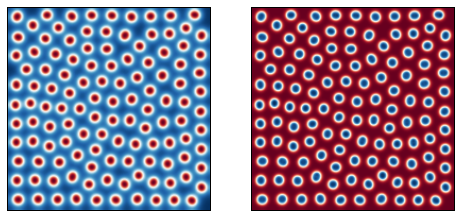

In [21]:
#Plot results
plt.close()
fig = plt.figure(figsize=(8,5))
plt.subplot(121)
plt.imshow(u_f, cmap = cm.RdBu)
plt.xticks([]), plt.yticks([]);
plt.subplot(122)
plt.imshow(v_f, cmap = cm.RdBu)
plt.xticks([]), plt.yticks([]);
plt.show()

In [22]:
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import animation
from JSAnimation.IPython_display import display_animation

AttributeError: 'module' object has no attribute 'RsBu'

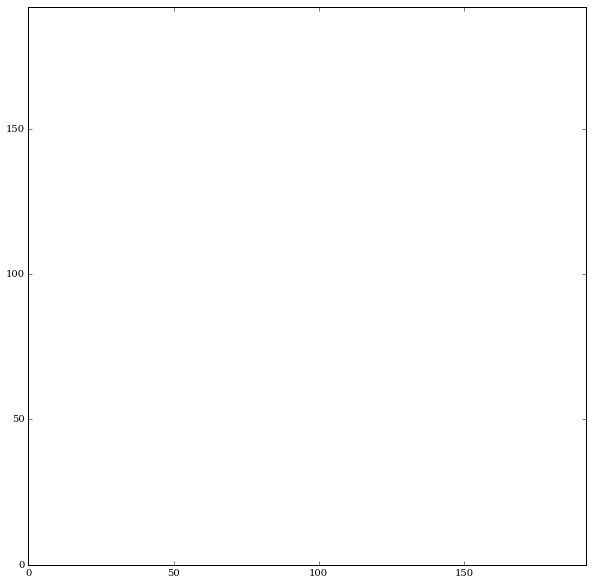

In [42]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(xlim=(0,192), ylim=(0,192))
#line = ax.plot([], [], color='#003366', ls='--', lw=3)[0]

fig = plt.figure(figsize=(8,5), dpi=72)

#img = plt.imshow(u_n,cmap = cm.RdBu)

def animate(un):
    for t in range(nt):
        img=plt.imshow(u_n,cmap = cm.RsBu)
        img.set_array(u_n)
    return img,
anim = animation.FuncAnimation(fig, animate, frames=u_n, interval=85)
display_animation(anim, default_mode='once')

